In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get the file
downloaded = drive.CreateFile({'id': '1vxdnysOqBKsPUEvplfihJworB9VDqsqB'}) #replace the my_id with id of file you want to access
downloaded.GetContentFile('SVHN_single_grey1.h5')

In [0]:
import h5py
import numpy as np

# Open the file as readonly. The file should be present inside a directory called "data" in the same folder as code
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

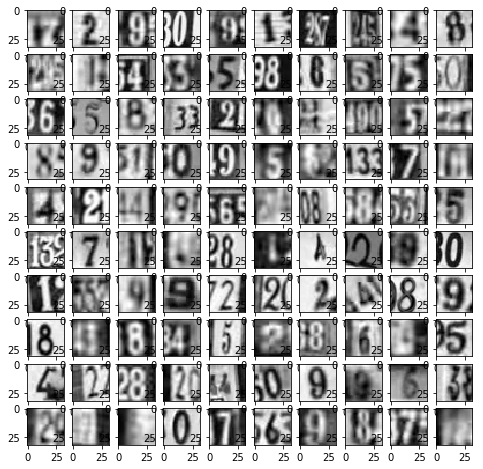

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [0]:
x_train= x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test= x_test.reshape(x_test.shape[0], 32, 32, 1)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42000, 32, 32, 1)
(42000,)
(18000, 32, 32, 1)
(18000,)


In [0]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= np.max(x_train) # Normalise data to [0, 1] range
x_test /= np.max(x_train) # Normalise data to [0, 1] range


In [9]:
np.max(x_train)

1.0

In [10]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
num_classes = np.unique(y_train).shape[0]

In [0]:
ytrain= tf.keras.utils.to_categorical(
    y_train,
    num_classes=None,
    dtype='float32'
)

ytest= tf.keras.utils.to_categorical(
    y_test,
    num_classes=None,
    dtype='float32'
)

In [13]:
ytest.shape

(18000, 10)

In [0]:
#depth, height, width = x_train.shape
#inp = Input(shape=(depth, height, width))

In [21]:
model2 = Sequential()
    # 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model2.add(Activation('relu'))
# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))


# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [24]:
model2.fit(x_train, ytrain, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, ytest), callbacks=callback_list)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
   32/42000 [..............................] - ETA: 3:19 - loss: 0.0751 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


42000/42000 [==============================] - 158s 4ms/step - loss: 0.1004 - acc: 0.9688 - val_loss: 2.5689 - val_acc: 0.8384
Epoch 2/10
42000/42000 [==============================] - 158s 4ms/step - loss: 0.0898 - acc: 0.9717 - val_loss: 3.0008 - val_acc: 0.8121
Epoch 3/10
42000/42000 [==============================] - 157s 4ms/step - loss: 0.0736 - acc: 0.9771 - val_loss: 2.7538 - val_acc: 0.8278
Epoch 4/10
42000/42000 [==============================] - 157s 4ms/step - loss: 0.0720 - acc: 0.9785 - val_loss: 2.6169 - val_acc: 0.8361
Epoch 5/10
42000/42000 [==============================] - 157s 4ms/step - loss: 0.0608 - acc: 0.9812 - val_loss: 2.8746 - val_acc: 0.8205
Epoch 6/10
42000/42000 [==============================] - 157s 4ms/step - loss: 0.0586 - acc: 0.9815 - val_loss: 2.6705 - val_acc: 0.8333
Epoch 00006: early stopping


In [25]:
model = Sequential()
    # 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model.add(Activation('relu'))
# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))


# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [0]:
model.fit(x_train, ytrain, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, ytest), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 133s 3ms/step - loss: 2.1821 - acc: 0.2137 - val_loss: 13.5672 - val_acc: 0.1558
Epoch 2/10
42000/42000 [==============================] - 133s 3ms/step - loss: 1.3528 - acc: 0.5755 - val_loss: 9.5917 - val_acc: 0.3997
Epoch 3/10
42000/42000 [==============================] - 135s 3ms/step - loss: 1.0381 - acc: 0.6834 - val_loss: 6.5816 - val_acc: 0.5865
Epoch 4/10
42000/42000 [==============================] - 134s 3ms/step - loss: 0.8638 - acc: 0.7405 - val_loss: 5.2786 - val_acc: 0.6674
Epoch 5/10
42000/42000 [==============================] - 134s 3ms/step - loss: 0.7460 - acc: 0.7779 - val_loss: 4.3903 - val_acc: 0.7228
Epoch 6/10
42000/42000 [==============================] - 133s 3ms/step - loss: 0.6583 - acc: 0.8036 - val_loss: 4.4054 - val_acc: 0.7229
Epoch 7/10
42000/42000 [==============================] - 132s 3ms/step - loss: 0.5945 - acc: 0.8242 - val_loss: 3.9686 -